In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#leer el archivo csv
df = pd.read_csv("C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Venta.csv")

In [3]:
#mostrar archivo csv
df.head(5)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [4]:
#verificar el tipo de dato de cada columna
df.dtypes

IdVenta            int64
Fecha             object
Fecha_Entrega     object
IdCanal            int64
IdCliente          int64
IdSucursal         int64
IdEmpleado         int64
IdProducto         int64
Precio           float64
Cantidad         float64
dtype: object

In [5]:
# cambiar el tipo de dato a tipo date time
df['Fecha'] = pd.to_datetime(df['Fecha'])

df.dtypes

IdVenta                   int64
Fecha            datetime64[ns]
Fecha_Entrega            object
IdCanal                   int64
IdCliente                 int64
IdSucursal                int64
IdEmpleado                int64
IdProducto                int64
Precio                  float64
Cantidad                float64
dtype: object

In [6]:
#obtener únicamente los años
años = df['Fecha'].dt.year.unique()
años.sort()
años

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [7]:
#ordenar el data frame por fecha
df = df.sort_values('Fecha')
df.head(3)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
39353,39354,2015-01-01,2015-01-04,1,529,27,3588,42824,584.76,2.0
24818,24819,2015-01-01,2015-01-03,3,1112,17,3172,42905,456.00,2.0
13230,13231,2015-01-01,2015-01-04,3,1257,6,1426,42906,321.00,2.0


In [8]:
#obtener las ventas al multiplicar la columna precio y cantidad
df['Ventas'] = df['Precio'] * df['Cantidad']
df.head(3)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Ventas
39353,39354,2015-01-01,2015-01-04,1,529,27,3588,42824,584.76,2.0,1169.52
24818,24819,2015-01-01,2015-01-03,3,1112,17,3172,42905,456.00,2.0,912.00
13230,13231,2015-01-01,2015-01-04,3,1257,6,1426,42906,321.00,2.0,642.00


In [9]:
#obtener las ventas por cada canal de ventas
df_Canal_1 = df[df['IdCanal']==1].copy()
df_Canal_2 = df[df['IdCanal']==2].copy()
df_Canal_3 = df[df['IdCanal']==3].copy()

df_Canal_1.head(3)
#df_Canal_2.head(3)
#df_Canal_3.head(3)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Ventas
39353,39354,2015-01-01,2015-01-04,1,529,27,3588,42824,584.76,2.0,1169.52
2101,2102,2015-01-01,2015-01-06,1,891,1,1674,42835,818.84,3.0,2456.52
27382,27383,2015-01-01,2015-01-07,1,511,20,3186,42991,438.00,3.0,1314.00


In [29]:
#crear un nuevo data frame con la suma de las ventas de cada fecha
df_Fecha_Ventas_1 = df_Canal_1.groupby('Fecha')['Ventas'].sum().reset_index()
df_Fecha_Ventas_2 = df_Canal_2.groupby('Fecha')['Ventas'].sum().reset_index()
df_Fecha_Ventas_3 = df_Canal_3.groupby('Fecha')['Ventas'].sum().reset_index()

df_Fecha_Ventas_1['Ventas'] = df_Fecha_Ventas_1['Ventas'].astype(int)
df_Fecha_Ventas_2['Ventas'] = df_Fecha_Ventas_2['Ventas'].astype(int)
df_Fecha_Ventas_3['Ventas'] = df_Fecha_Ventas_3['Ventas'].astype(int)


#df_Fecha_Ventas_1.head(3)
#df_Fecha_Ventas_2.head(3)
#df_Fecha_Ventas_3.head(3)

df_Fecha_Ventas_1.dtypes

Fecha     datetime64[ns]
Ventas             int32
dtype: object

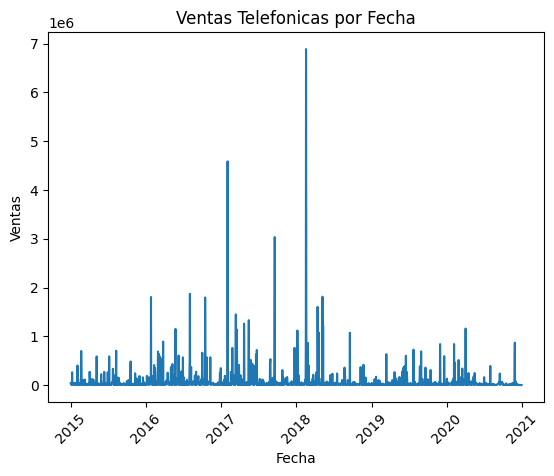

In [30]:
#obtner la grafica de comportamiento de las ventas canal 1
plt.plot(df_Fecha_Ventas_1['Fecha'], df_Fecha_Ventas_1['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Ventas Telefonicas por Fecha')

# Mostrar el gráfico
plt.show()

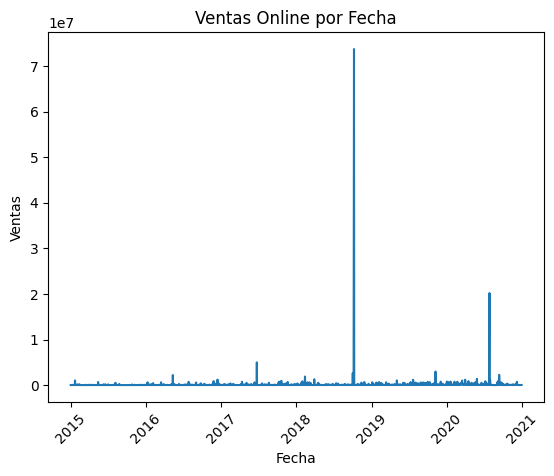

In [31]:
#obtner la grafica de comportamiento de las ventas canal 2
plt.plot(df_Fecha_Ventas_2['Fecha'], df_Fecha_Ventas_2['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Ventas Online por Fecha')

# Mostrar el gráfico
plt.show()

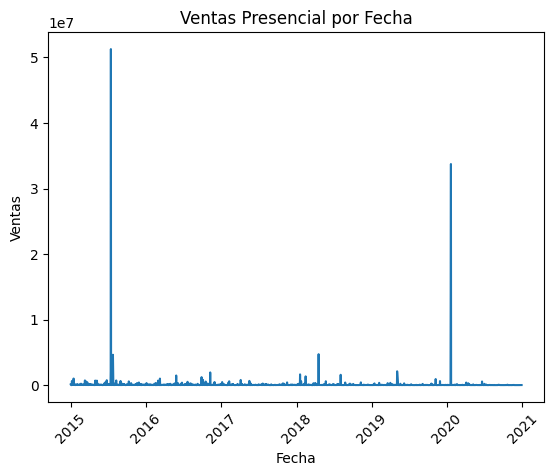

In [32]:
#obtner la grafica de comportamiento de las ventas canal 3
plt.plot(df_Fecha_Ventas_3['Fecha'], df_Fecha_Ventas_3['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Ventas Presencial por Fecha')

# Mostrar el gráfico
plt.show()

In [33]:
#crear un nuevo data frame con la cantiad de las ventas de cada fecha
df_Fecha_C_Ventas_1 = df_Canal_1.groupby(pd.Grouper(key='Fecha',freq='M'))['Ventas'].count().reset_index()
df_Fecha_C_Ventas_2 = df_Canal_2.groupby(pd.Grouper(key='Fecha',freq='M'))['Ventas'].count().reset_index()
df_Fecha_C_Ventas_3 = df_Canal_3.groupby(pd.Grouper(key='Fecha',freq='M'))['Ventas'].count().reset_index()

df_Fecha_C_Ventas_1['Ventas'] = df_Fecha_C_Ventas_1['Ventas'].astype(int)
df_Fecha_C_Ventas_2['Ventas'] = df_Fecha_C_Ventas_2['Ventas'].astype(int)
df_Fecha_C_Ventas_3['Ventas'] = df_Fecha_C_Ventas_3['Ventas'].astype(int)

df_Fecha_C_Ventas_1.head(3)
#df_Fecha_C_Ventas_2
#df_Fecha_C_Ventas_3

,Fecha,Ventas
0,2015-01-31,165
1,2015-02-28,152
2,2015-03-31,160


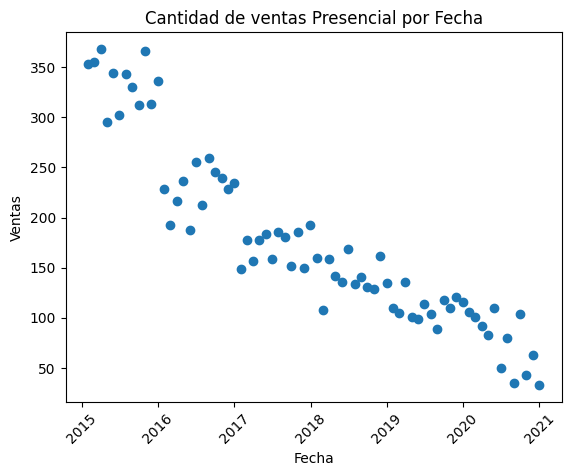

In [34]:
#obtner la grafica de comportamiento de la cantidad ventas canal 3
plt.scatter(df_Fecha_C_Ventas_3['Fecha'], df_Fecha_C_Ventas_3['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Cantidad de ventas Presencial por Fecha')

# Mostrar el gráfico
plt.show()

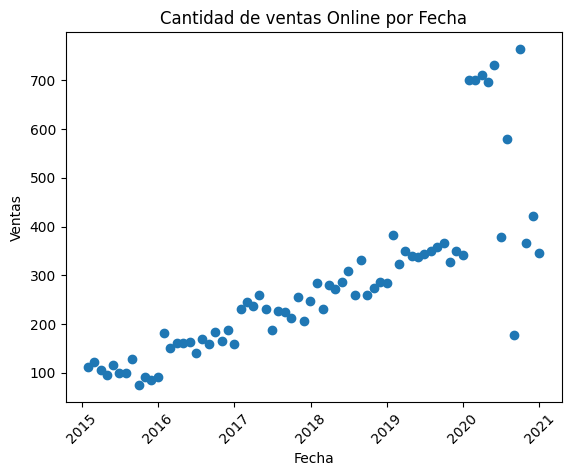

In [35]:
#obtner la grafica de comportamiento de las ventas canal 2
plt.scatter(df_Fecha_C_Ventas_2['Fecha'], df_Fecha_C_Ventas_2['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Cantidad de ventas Online por Fecha')

# Mostrar el gráfico
plt.show()

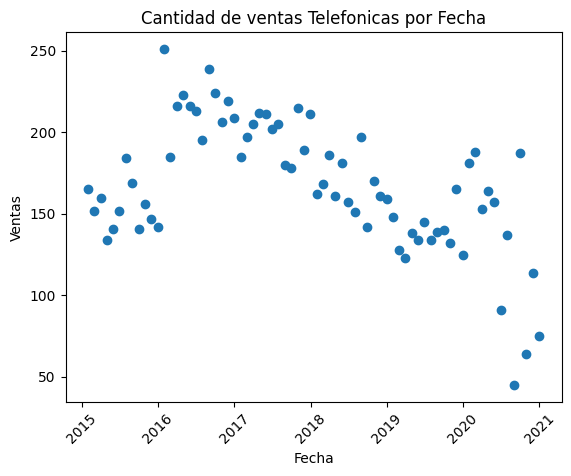

In [36]:
#obtner la grafica de comportamiento de las ventas canal 1
plt.scatter(df_Fecha_C_Ventas_1['Fecha'], df_Fecha_C_Ventas_1['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Cantidad de ventas Telefonicas por Fecha')

# Mostrar el gráfico
plt.show()

In [37]:
#analizar el comportamiento de la cantidad de ventas para el año 2020
#cambiar el tipo de dato a datetime
df_Fecha_C_Ventas_2['Fecha'] = pd.to_datetime(df_Fecha_C_Ventas_2['Fecha'])
df_Fecha_C_Ventas_2.dtypes

Fecha     datetime64[ns]
Ventas             int32
dtype: object

In [38]:
#obtener solo las ventas del año 2020
df_Fecha_C_Ventas_2_2020 = df_Fecha_C_Ventas_2.loc[df_Fecha_C_Ventas_2['Fecha'].dt.year == 2020].copy()
df_Fecha_C_Ventas_2_2020


,Fecha,Ventas
60,2020-01-31,700
61,2020-02-29,700
62,2020-03-31,711
63,2020-04-30,696
64,2020-05-31,731
65,2020-06-30,379
66,2020-07-31,580
67,2020-08-31,178
68,2020-09-30,764
69,2020-10-31,367


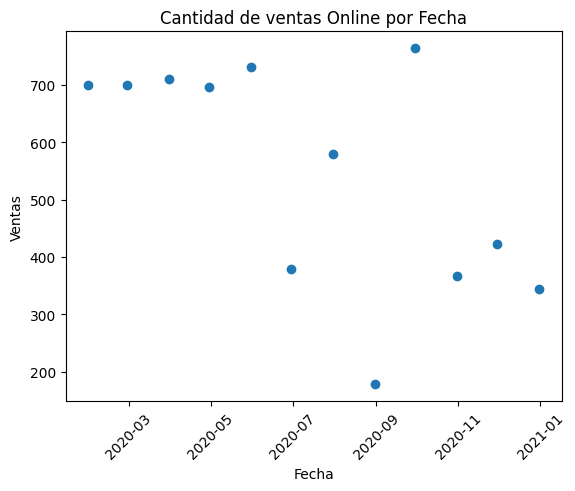

In [39]:
#obtner la grafica de comportamiento de las ventas canal 2 para el año 2020
plt.scatter(df_Fecha_C_Ventas_2_2020['Fecha'], df_Fecha_C_Ventas_2_2020['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Cantidad de ventas Online por Fecha')

# Mostrar el gráfico
plt.show()

In [40]:
#obervamos que los meses de junio, octubre y noviembre son los que traen la misma tendencia de los valores normal
#anteriores así que vamos a eliminar los demás


# Crear una lista con los índices a eliminar
indices_a_eliminar = list(range(60, 65)) + list(range(66, 69)) + list(range(71, 72))

# Eliminar las filas correspondientes a los índices
df_Fecha_C_Ventas_2_n = df_Fecha_C_Ventas_2.drop(indices_a_eliminar).reset_index(drop=True)

df_Fecha_C_Ventas_2_n

,Fecha,Ventas
0,2015-01-31,112
1,2015-02-28,123
2,2015-03-31,106
3,2015-04-30,95
4,2015-05-31,117
...,...,...
58,2019-11-30,350
59,2019-12-31,341
60,2020-06-30,379
61,2020-10-31,367


In [41]:
#obervamos que los meses de junio, julio, agosto, octubre, noviembre y diciembre no muestran tendencia alta
#los consideramemos como eventos átipicos por lo tanto los vamos a descartar

# Crear una lista con los índices a eliminar
indices_a_eliminar = list(range(65, 68)) + list(range(69, 72))

# Eliminar las filas correspondientes a los índices
df_Fecha_C_Ventas_2_A = df_Fecha_C_Ventas_2.drop(indices_a_eliminar).reset_index(drop=True)

df_Fecha_C_Ventas_2_A

,Fecha,Ventas
0,2015-01-31,112
1,2015-02-28,123
2,2015-03-31,106
3,2015-04-30,95
4,2015-05-31,117
...,...,...
61,2020-02-29,700
62,2020-03-31,711
63,2020-04-30,696
64,2020-05-31,731


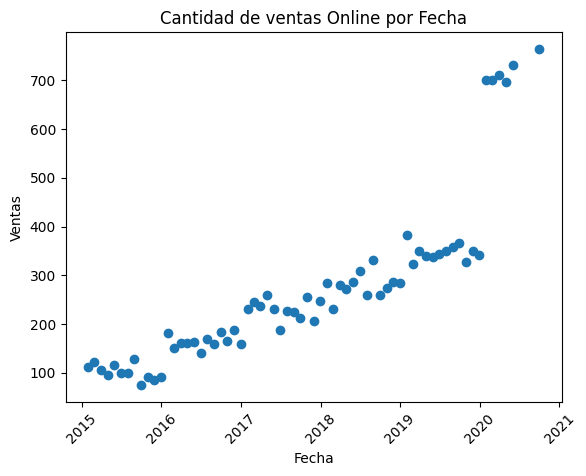

In [42]:
#obtner la grafica de comportamiento de las ventas canal 2 con la tendencia alta
plt.scatter(df_Fecha_C_Ventas_2_A['Fecha'], df_Fecha_C_Ventas_2_A['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Cantidad de ventas Online por Fecha')

# Mostrar el gráfico
plt.show()

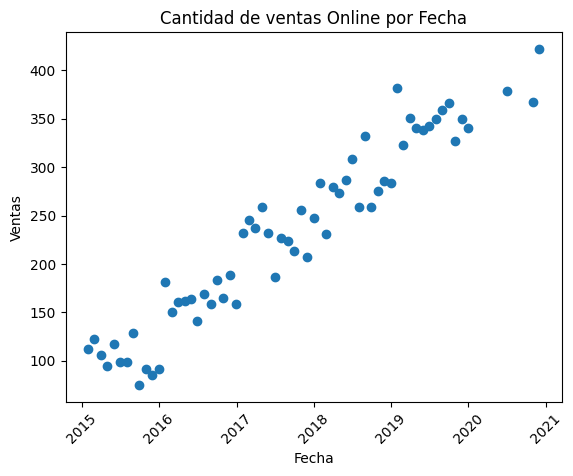

In [43]:
#obtner la grafica de comportamiento de las ventas canal 2 con la tendencia normal
plt.scatter(df_Fecha_C_Ventas_2_n['Fecha'], df_Fecha_C_Ventas_2_n['Ventas'])

# Configurar el eje X para mostrar las fechas de manera legible
plt.xticks(rotation=45)

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# Título del gráfico
plt.title('Cantidad de ventas Online por Fecha')

# Mostrar el gráfico
plt.show()

In [44]:
#guardar los data frame en archivo csv de las ventas por canal de ventas
df_Fecha_Ventas_1.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vtsG_tel.csv', index=False)
df_Fecha_Ventas_2.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vtsG_online.csv', index=False)
df_Fecha_Ventas_3.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vtsG_pres.csv', index=False)

In [45]:
#guardar ambos data frame en archivos csv para trabajarlos posteriomente

df_Fecha_C_Ventas_2_n.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vts_online_n.csv', index=False)
df_Fecha_C_Ventas_2_A.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vts_online_A.csv', index=False)

In [46]:
#guardar los data frame en archivo csv de las ventas por canal de ventas
df_Fecha_C_Ventas_1.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vts_tel.csv', index=False)
df_Fecha_C_Ventas_3.to_csv('C:/Users/willi/OneDrive/Escritorio/Proyectos/Insumos_Tecnologicos_SA/Datasets/Fch_vts_pres.csv', index=False)